In [2]:
import tensorflow as tf
import numpy as np

In [3]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32,(None,n_features))

w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

xw = tf.matmul(x,w)

z = tf.add(xw,b)

a = tf.sigmoid(z)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out  = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [4]:
print(layer_out)

[[0.9836961  0.63691473 0.6334418 ]]


Simple Regression Example

In [15]:
x_data = np.linspace(0,10,10)  + np.random.uniform(-1.5, 1.5, 10)


In [16]:
x_data

array([ 1.17279307,  1.93468554,  3.03743366,  2.73133271,  3.10932553,
        5.59246061,  6.23918658,  9.19790669,  9.45917363, 10.38919078])

In [13]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)


In [14]:
y_data

array([ 1.42560687,  2.01881242,  1.77361551,  2.32096159,  3.51835961,
        5.32305695,  6.63437645,  6.72626433, 10.07209744, 10.04434807])

In [16]:
import matplotlib.pyplot as plt 
%matplotlib  inline 

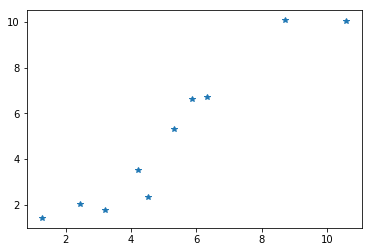

In [18]:
plt.plot(x_data, y_data,"*")

In [19]:
np.random.rand(2)

array([0.53673228, 0.90217454])

In [20]:
m = tf.Variable(0.53)
b = tf.Variable(0.902)

In [21]:
error = 0
for x,y in zip(x_data,y_data):
    
    y_hat = m*x + b
    error += (y - y_hat)**2
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001) 
train = optimizer.minimize(error)

    

In [22]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 10000
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b]) 

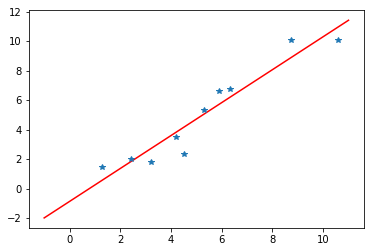

In [31]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,"r")
plt.plot(x_data,y_data,"*")